# Following code is borrowed from PyTorch website tutorials
https://www.datacamp.com/tutorial/pytorch-tutorial-building-a-simple-neural-network-from-scratch

https://github.com/christianversloot/machine-learning-articles/blob/main/creating-a-simple-binary-svm-classifier-with-python-and-scikit-learn.md



In [234]:
# Imports
from sklearn.datasets import make_blobs, make_circles, make_moons
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import ConfusionMatrixDisplay

In [235]:
# Configuration options
blobs_random_seed = 42
centers = [(0,0), (5,5)]
cluster_std = 1
frac_test_split = 0.33
num_features_for_samples = 2
num_samples_total = 1000

In [236]:
# Generate data
#X, y = make_blobs(n_samples = num_samples_total, centers = centers, n_features = num_features_for_samples, cluster_std = cluster_std)
X, y = make_moons(n_samples=num_samples_total, noise=0.20)
#X, y = make_circles(n_samples = num_samples_total, noise= 0.05, random_state=26)


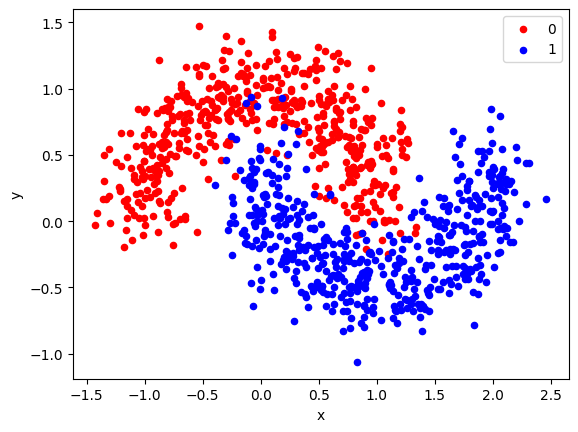

In [237]:
# Generate scatter plot for training data
# scatter plot, dots colored by class value
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot.show()

In [238]:

# Initialize SVM classifier
clf = svm.SVC(kernel='linear')
clf = svm.SVC(kernel='rbf')
clf = KNeighborsClassifier(n_neighbors=20)

# Fit data
clf = clf.fit(X, y)

# Predict the test set
y_pred = clf.predict(X)


              precision    recall  f1-score   support

           0       0.96      0.97      0.97       500
           1       0.97      0.96      0.97       500

    accuracy                           0.97      1000
   macro avg       0.97      0.97      0.97      1000
weighted avg       0.97      0.97      0.97      1000



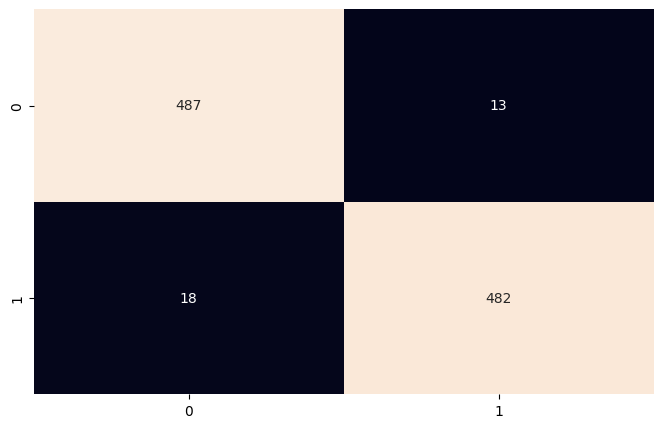

In [239]:
#https://scikit-learn.org/1.5/modules/generated/sklearn.metrics.classification_report.html
#https://www.evidentlyai.com/classification-metrics/multi-class-metrics

print(classification_report(y, y_pred))

cf_matrix = confusion_matrix(y, y_pred)

plt.subplots(figsize=(8, 5))

sns.heatmap(cf_matrix, annot=True, cbar=False, fmt="g")

plt.show()

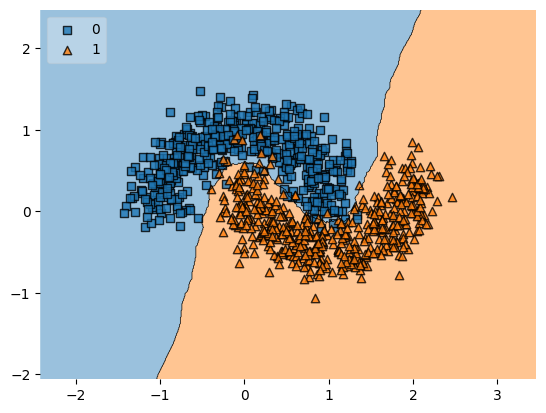

In [240]:
# Plot decision boundary
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X, y, clf=clf, legend=2)
plt.show()